In [4]:
import numpy as np
import flow
import os
import matplotlib.pyplot as plt
from munkres import Munkres
from scipy.cluster import hierarchy

In [6]:
mouse = 'OA27'
trace_type = 'zscore'
days = flow.DateSorter.frommeta(mice=[mouse], tags=None)
# day1 = days[0]
# day2 = days[1]

for c, day1 in enumerate(days, 0):
    try:
        day2 = days[c+1]
    except IndexError:
        print('done.')
        break
        
    out_dir = os.path.join(flow.paths.outd, str(day1.mouse))
    if not os.path.isdir(out_dir):
        os.mkdir(out_dir)
    load_dir = os.path.join(out_dir, 'tensors paired ' + str(trace_type))
    if not os.path.isdir(load_dir):
        os.mkdir(load_dir)
    tensor_path = os.path.join(load_dir, str(day1.mouse) + '_' + str(day1.date)
                     + '_' + str(day2.date) + '_pair_decomp_' + str(trace_type) + '.npy')

    ensemble = np.load(tensor_path)
    ensemble = ensemble.item()
    
    for m in ensemble:
        
        if c == 0:
            U = ensemble[m].results[7][0].factors
            V = ensemble[m].results[8][0].factors
#         if c == 1:
#             V = ensemble[m].results[7][0].factors
    break

7

In [7]:
# Compute similarity matrices.
unrm = [f / np.linalg.norm(f, axis=0) for f in U.factors]
vnrm = [f / np.linalg.norm(f, axis=0) for f in V.factors]
# if a factor is zero make sure that 0/0 does not cause nans, KLM
for c, f in enumerate(unrm):
    f[np.isnan(f)] = 0
    unrm[c] = f
for c, f in enumerate(vnrm):
    f[np.isnan(f)] = 0
    vnrm[c] = f
# sim_matrices = [np.dot(u.T, v) for u, v in zip(unrm, vnrm)]
# cost = 1 - np.mean(np.abs(sim_matrices), axis=0)

(7, 108)
(7, 108)
(8, 108)
(8, 108)


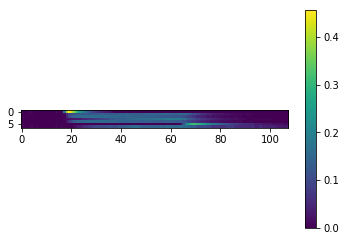

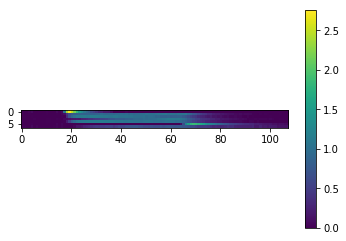

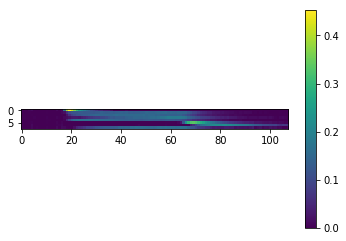

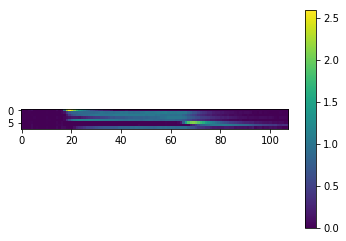

In [19]:
plt.figure()
plt.imshow(unrm[1].T)
plt.colorbar()
plt.figure()
plt.imshow(U.factors[1].T)
plt.colorbar()
print(np.shape(unrm[1].T))
print(np.shape(U.factors[1].T))
plt.figure()
plt.imshow(vnrm[1].T)
plt.colorbar()
plt.figure()
plt.imshow(V.factors[1].T)
plt.colorbar()
print(np.shape(vnrm[1].T))
print(np.shape(V.factors[1].T))

0.9999999999999998
0.9999999999999998
0.38231748618025596


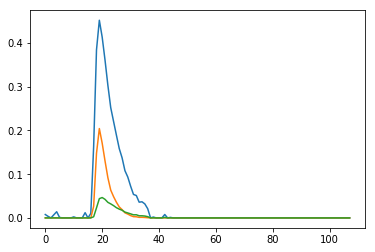

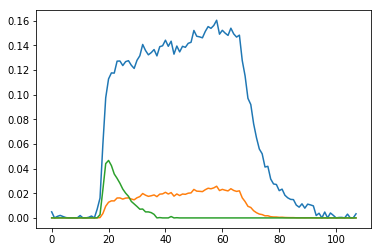

In [87]:
test_vec0 = vnrm[1].T[0,:]
test_vec1 = vnrm[1].T[1,:]
plt.figure()
plt.plot(test_vec0)
plt.plot(test_vec0*test_vec0)
print(np.sum(test_vec0*test_vec0))
plt.plot(test_vec1*test_vec0)
plt.figure()
plt.plot(test_vec1)
plt.plot(test_vec1*test_vec1)
plt.plot(test_vec0*test_vec1)
print(np.sum(test_vec1*test_vec1))
print(np.sum(test_vec1*test_vec0))

In [8]:
sim_matrices = [np.dot(u.T, v) for u, v in zip(unrm, vnrm)]
cost = 1 - np.mean(np.abs(sim_matrices), axis=0)

(7, 108)
(108, 8)


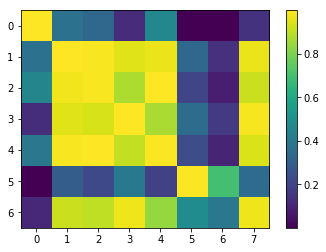

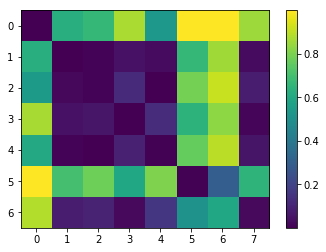

In [9]:
print(np.shape(unrm[1].T))
print(np.shape(vnrm[1]))
test_sim = np.dot(unrm[1].T, vnrm[1])
test_cost = 1 - test_sim
plt.figure()
plt.imshow(test_sim)
plt.colorbar()
plt.figure()
# abs seems redundant since you have already scaled from 0 to 1, maybe for unconstrained decomp?
plt.imshow(test_cost)
plt.colorbar()

In [10]:
 indices = Munkres().compute(test_cost.copy())

In [11]:
indices

[(0, 0), (1, 1), (2, 4), (3, 3), (4, 2), (5, 5), (6, 7)]

In [41]:
prmU, prmV = zip(*indices)
print(prmU, prmV)
similarity = np.mean(1 - cost[prmU, prmV])
print(cost[prmU, prmV])

(0,) (1,)
[0.70889423]


In [42]:
unmatched_U = list(set(range(U.rank)) - set(prmU))
unmatched_V = list(set(range(V.rank)) - set(prmV))

In [48]:
test_cost

array([[0.64697832, 0.21304402, 0.23228738, 0.25112835, 0.23739941,
        0.62671237, 0.77139169, 0.24443265]])

In [12]:
unrm = [f / np.linalg.norm(f, axis=0) for f in U.factors]
vnrm = [f / np.linalg.norm(f, axis=0) for f in V.factors]
# if a factor is zero make sure that 0/0 does not cause nans, KLM
for c, f in enumerate(unrm):
    f[np.isnan(f)] = 0
    unrm[c] = f
for c, f in enumerate(vnrm):
    f[np.isnan(f)] = 0
    vnrm[c] = f
sim_matrices = [np.dot(u.T, v) for u, v in zip(unrm, vnrm)]
cost = 1 - np.mean(np.abs(sim_matrices), axis=0)

# Solve matching problem via Hungarian algorithm.
indices = Munkres().compute(cost.copy())
prmU, prmV = zip(*indices)

In [13]:
np.shape(cost)

(7, 8)

In [14]:
np.shape(sim_matrices)

(3, 7, 8)

(7, 8)
(7, 8)
(7, 8)
(7, 8)


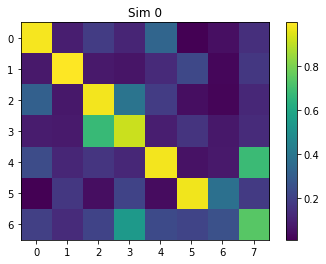

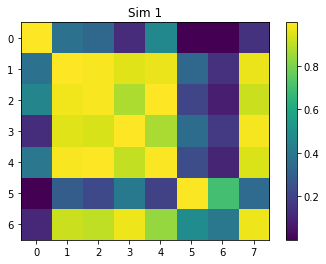

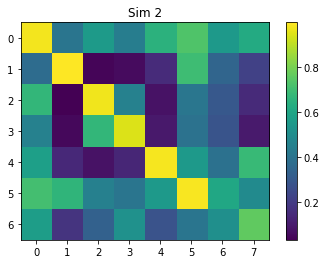

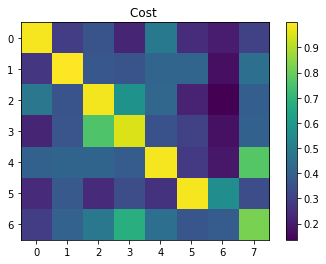

In [75]:
for c, s in enumerate(sim_matrices):
    print(np.shape(s))
    plt.figure()
    plt.imshow(s)
    plt.title('Sim ' + str(c))
    plt.colorbar()

print(np.shape(cost))
plt.figure()
plt.imshow(cost)
plt.title('Cost ')
plt.colorbar() 

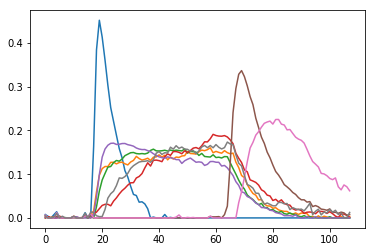

In [19]:
test = vnrm[1].T
plt.plot(test.T)

In [20]:
U = test
Z = hierarchy.ward(U)
hierarchy.leaves_list(hierarchy.optimal_leaf_ordering(Z, U))

array([6, 5, 3, 7, 1, 2, 4, 0], dtype=int32)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [25.0, 25.0, 51.25, 51.25],
  [10.0, 10.0, 38.125, 38.125]],
 'dcoord': [[0.0, 0.8664565891904764, 0.8664565891904764, 0.0],
  [0.0, 0.1619802597579521, 0.1619802597579521, 0.0],
  [0.0, 0.13456923098500848, 0.13456923098500848, 0.0],
  [0.0, 0.21852196667691667, 0.21852196667691667, 0.13456923098500848],
  [0.1619802597579521,
   0.5443893098573266,
   0.5443893098573266,
   0.21852196667691667],
  [0.0, 1.5084269339627507, 1.5084269339627507, 0.5443893098573266],
  [0.8664565891904764,
   1.9066524607071709,
   1.9066524607071709,
   1.5084269339627507]],
 'ivl': ['5', '6', '0', '3', '7', '4', '1', '2'],
 'leaves': [5, 6, 0, 3, 7, 4, 1, 2],
 'color_list': ['g', 'r', 'r', 'r', 'r', 'b', 'b']}

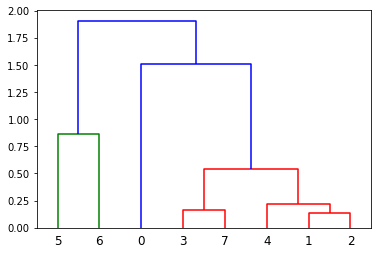

In [27]:
hierarchy.dendrogram(Z)